In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [36]:
stokes_parametrs = np.loadtxt('stokes_parametrs.txt')

In [55]:
def polarization(polarization_0: np.ndarray,
                 polarization_90: np.ndarray,
                 polarization_45: np.ndarray,
                 polarization_135: np.ndarray) -> dict:
    """Рассчитавает степень поляризации каждого пикселя

    Args:
        polarization_0 (np.ndarray): фотография через поляроид 
        polarization_90 (np.ndarray): фотография через поляроид, скрещенный к исходному
        polarization_45 (np.ndarray): фотография через поляроид с осью под 45 к исходному
        polarization_135 (np.ndarray): фотография через поляроид с осью под 135 к исходному

    Returns:
        dict: Степень поляризации и угол поляризации каждого из пикселей
    """
    global stokes_parametrs
    if len(polarization_0.shape) - 2:
        pass
    intensity_matrix = np.array([polarization_0,  
                                 polarization_90,  
                                 polarization_45,  
                                 polarization_135],
                                 dtype = np.float64)
    s = np.tensordot(stokes_parametrs, intensity_matrix, axes = 1) 
    dolp = np.sqrt(np.power(s[1], 2) + np.power(s[2], 2)) / s[0]
    aop = 0.5 * np.angle(s[1] + 1j * s[2])
    return {'linear_polarizatioin_degree': dolp,
            'angle_of_polarization': aop,
            's0': s[0],
            's1': s[1],
            's2': s[2]}

In [56]:
polarization_0 = cv2.imread('polarization_0.png', 0)
polarization_90 = cv2.imread('polarization_90.png', 0)

polarization_45 = cv2.imread('polarization_45.png', 0)
polarization_135 = cv2.imread('polarization_135.png', 0)

deg = polarization(polarization_0, polarization_90, polarization_45, polarization_135)


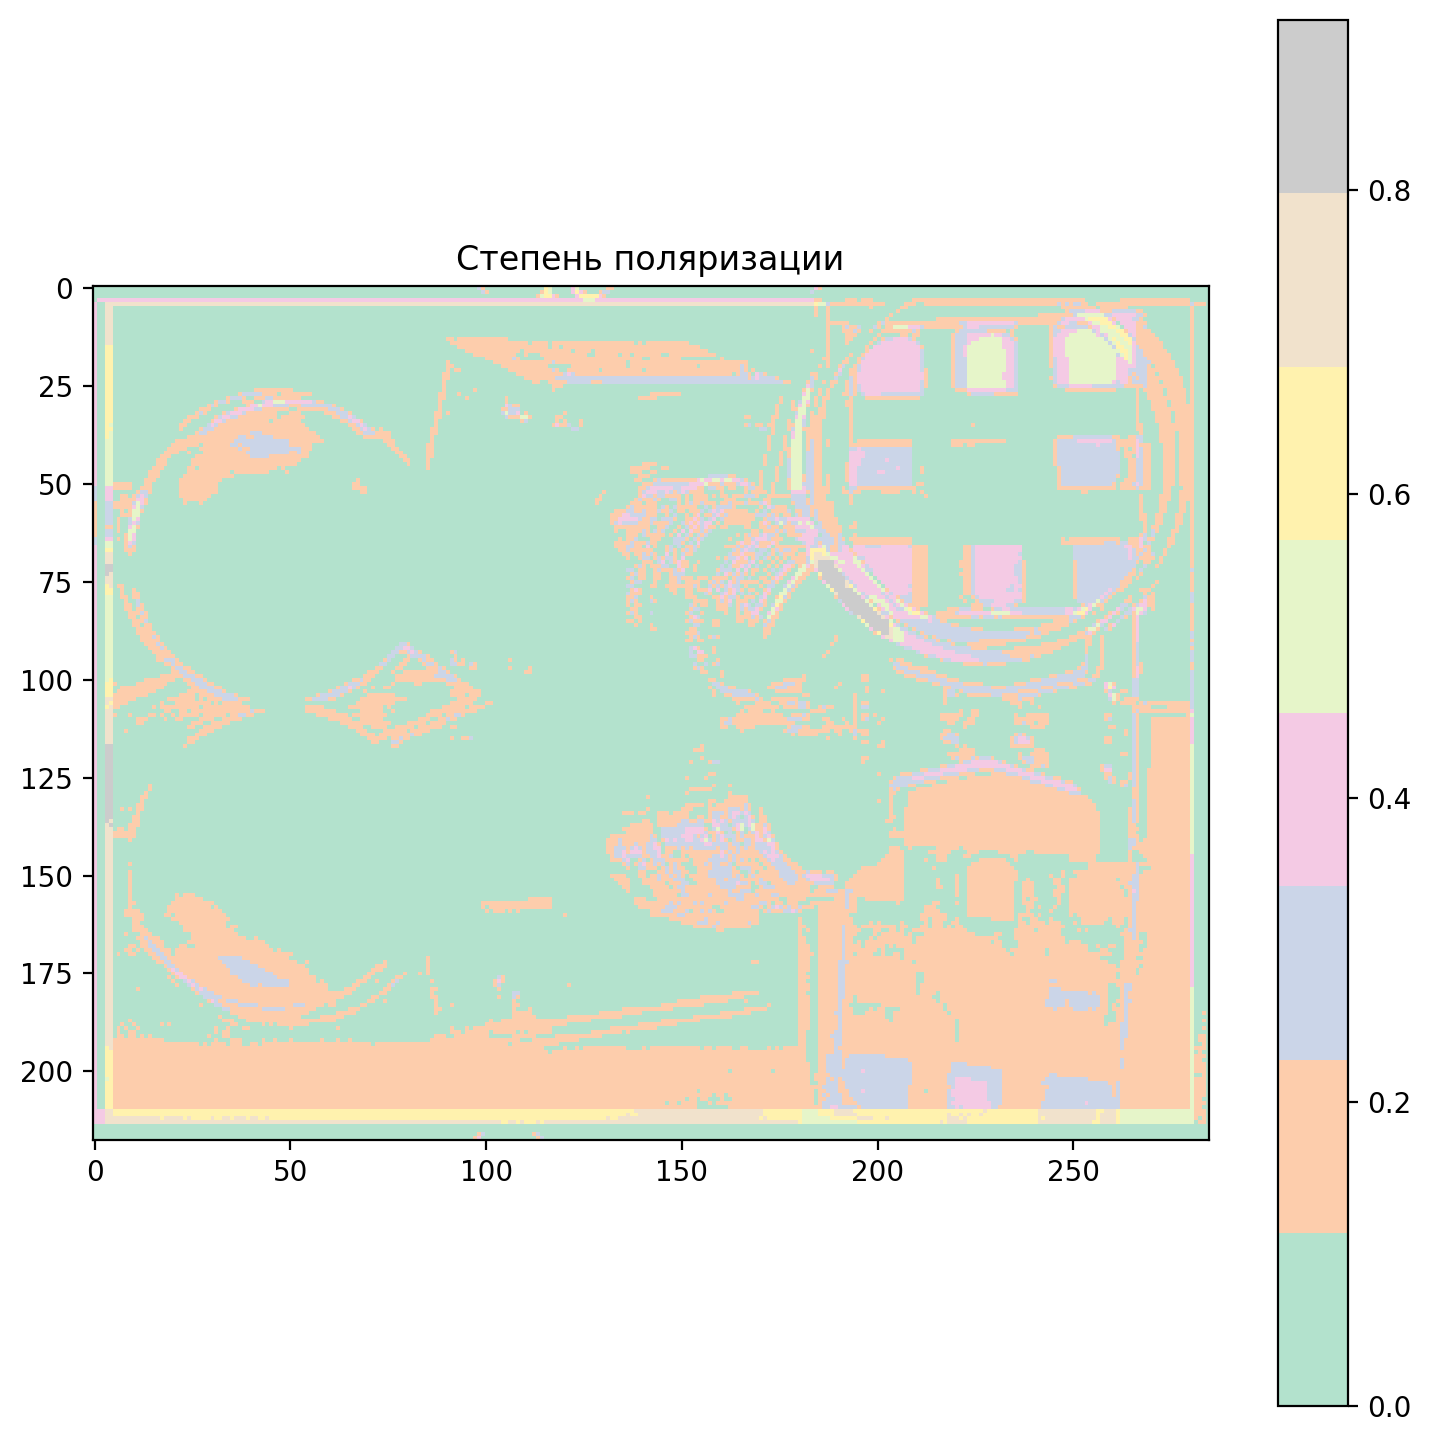

In [57]:
plt.figure(figsize = (9, 9), dpi = 200)
plt.imshow(deg['linear_polarizatioin_degree'] , cmap = 'Pastel2')
plt.colorbar()
plt.title("Степень поляризации");

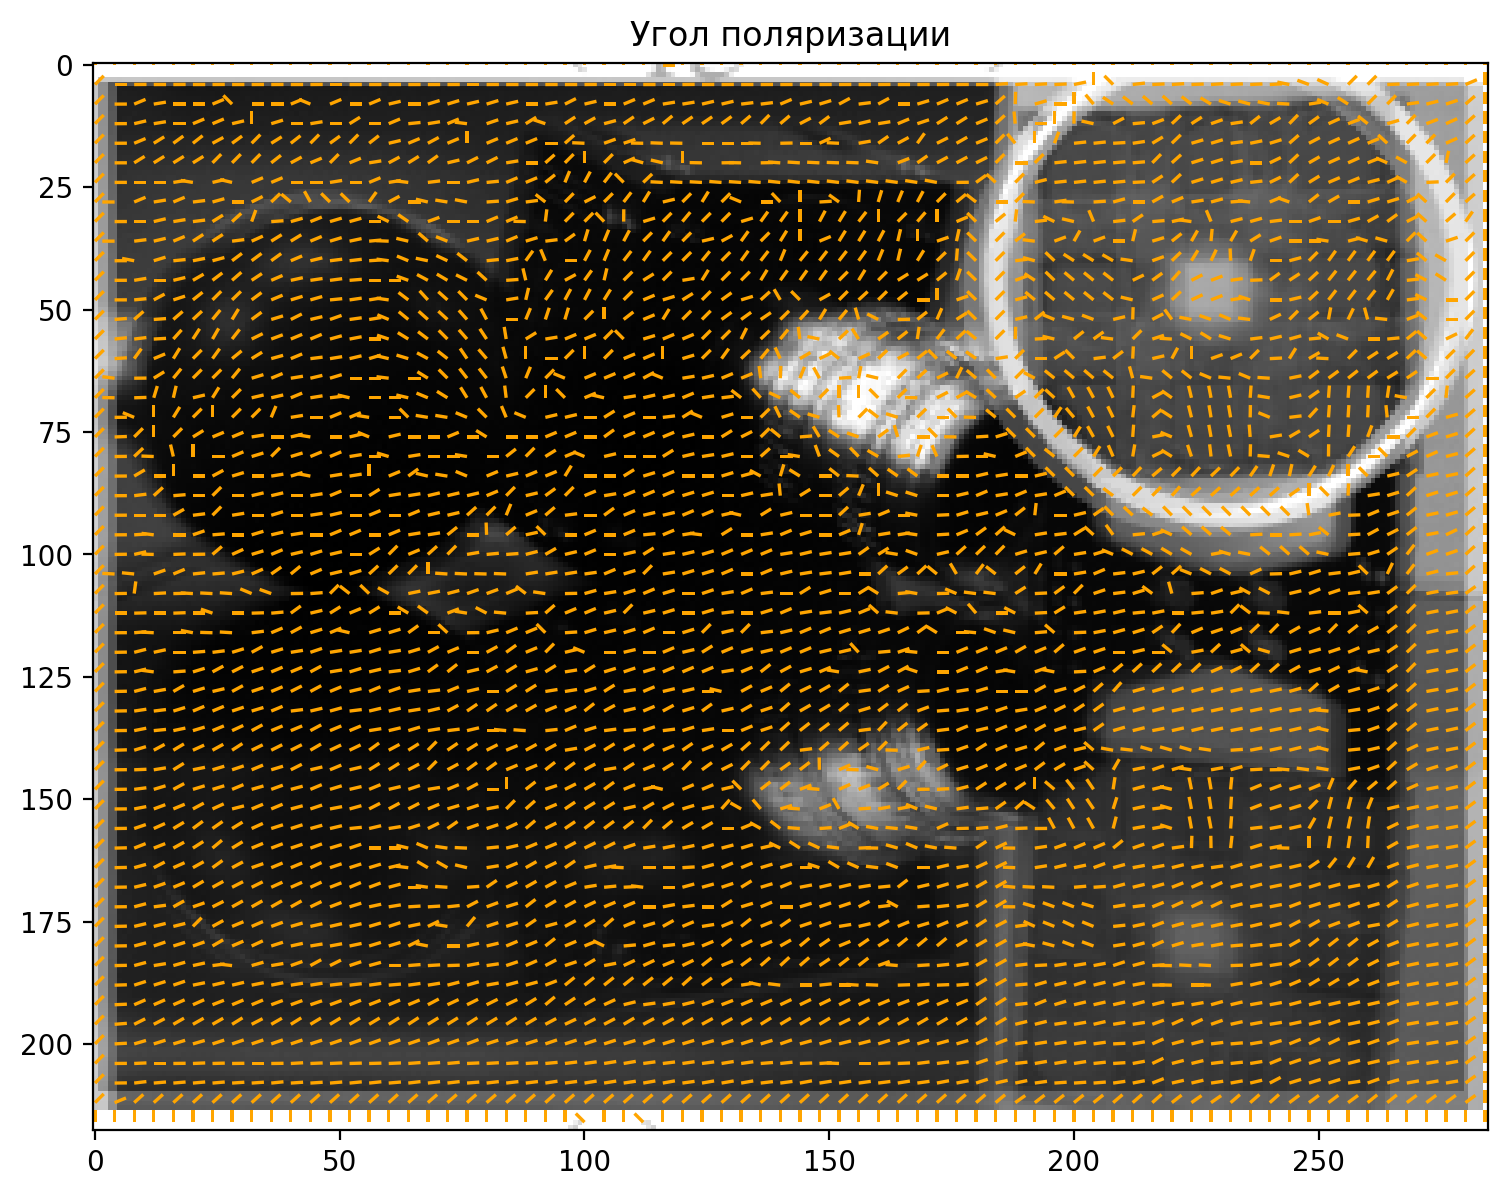

In [58]:
plt.figure(figsize = (9, 9), dpi = 200)

x = np.arange(0, polarization_0.shape[0], 4)
y = np.arange(0, polarization_0.shape[1], 4)

X, Y = np.meshgrid(x, y)

U = np.sin(deg['angle_of_polarization'][X, Y])
V = np.cos(deg['angle_of_polarization'][X, Y])

plt.quiver(Y, X, U, V, color = 'orange', headlength=0, headaxislength=0,)
plt.imshow(deg['s0'],
           cmap = 'gray')
plt.title("Угол поляризации");